<style>
.rendered_html * + ul {
	margin-top: 0.5em;
}
    div.text_cell_render {
    padding: 0.0em 0.0em 0.0em 0.0em;
}
    .reveal p {
    margin: 20px 10;
    line-height: 1.3;
}
    html, body, .reveal div, .reveal span, .reveal applet, .reveal object, .reveal iframe, .reveal h1, .reveal h2, .reveal h3, .reveal h4, .reveal h5, .reveal h6, .reveal p, .reveal blockquote, .reveal pre, .reveal a, .reveal abbr, .reveal acronym, .reveal address, .reveal big, .reveal cite, .reveal code, .reveal del, .reveal dfn, .reveal em, .reveal img, .reveal ins, .reveal kbd, .reveal q, .reveal s, .reveal samp, .reveal small, .reveal strike, .reveal strong, .reveal sub, .reveal sup, .reveal tt, .reveal var, .reveal b, .reveal u, .reveal center, .reveal dl, .reveal dt, .reveal dd, .reveal ol, .reveal ul, .reveal li, .reveal fieldset, .reveal form, .reveal label, .reveal legend, .reveal table, .reveal caption, .reveal tbody, .reveal tfoot, .reveal thead, .reveal tr, .reveal th, .reveal td, .reveal article, .reveal aside, .reveal canvas, .reveal details, .reveal embed, .reveal figure, .reveal figcaption, .reveal footer, .reveal header, .reveal hgroup, .reveal menu, .reveal nav, .reveal output, .reveal ruby, .reveal section, .reveal summary, .reveal time, .reveal mark, .reveal audio, .reveal video {
    margin-bottom: -1px;
}
    div.text_cell_render {
    padding: 0em 0em 0.5em 0.0em;
}
</style>

# Session 5: Strings, Queries and APIs

## Recap (I/II) 

We can think of there as being two 'types' of plots:
- **Exploratory** plots: Figures for understanding data
    - Quick to produce $\sim$ minimal polishing
    - Be careful showing these out of context
- **Explanatory** plots: Figures to convey a message
    - Polished figures
    - Direct attention to interesting feature in the data
    - Minimize risk of misunderstanding

There exist several packages for plotting.  Some popular ones:
- `Matplotlib` is good for customization (explanatory plots)
    - Might take a lot of time when customizing!
- `Seaborn` and `Pandas` are good quick and dirty plots (exploratory)

## Recap (II/II) 

We need to put a lot of thinking in how to present data.

In particular, one must consider the *type* of data that is to be presented:

- One variable:
    - Categorical: Pie charts, bar chart, etc. - but sometimes a plot is not even needed
    - Numeric: Histograms, distplot (/cumulative), boxplot in seaborn


- Multiple variables:
    - `scatter` (matplotlib) or `jointplot` (seaborn): Useful when (i) both variables are numeric and (ii) there are not too many observations
    - `lmplot` or `regplot` (seaborn) when you also want to fit a linear model
    - `barplot` (matplotlib), `catplot` and `violinplot` (both seaborn) when one or more variables are categorical
    - The option `hue` allows you to add a "third" categorical dimension... use with care
    - Lots of other plot types and options. Go explore yourself!

- When you just want to explore: `pairplot` (seaborn) plots all pairwise correlations

# General Questions

I have tried to gather some questions that seemed to address more general issues:
- Something is wrong when I use split-apply-combine...
- I cannot delete duplicates...
- How do I plot multiple plots in the same figure?

# Something Is Wrong When I Use Split-Apply-Combine (I/III)

Let's "simulate" some data!

In [2]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'a':np.arange(1,101,1),
                   'b':np.arange(1,101,1)*1/5,
                   'c':['q', 'q', 'q', 'z', 'z']*20,  
                   'd':['z','z','z','o','o']*20})
df.columns = ['val1','val2','cat1','cat2']
df

,val1,val2,cat1,cat2
0,1,0.2,q,z
1,2,0.4,q,z
2,3,0.6,q,z
3,4,0.8,z,o
4,5,1.0,z,o
...,...,...,...,...
95,96,19.2,q,z
96,97,19.4,q,z
97,98,19.6,q,z
98,99,19.8,z,o


# Something Is Wrong When I Use Split-Apply-Combine (II/III)

In general, the syntax is always the same

In [3]:
combined = df.groupby(['cat1','cat2'])[['val1','val2']].agg(['mean','median'])
combined

val1         val2       
           mean median  mean median
cat1 cat2                          
q    z     49.5   49.5   9.9    9.9
z    o     52.0   52.0  10.4   10.4

# Something Is Wrong When I Use Split-Apply-Combine (III/III)

*But now I have a multiindex... How do I access a given value?*

What you can do is to use a tuple-like structure:

In [4]:
combined.loc[('q','z'), ('val1', 'mean')]

49.5

If you would like to append the values to your original dataframe you can use the *transform()* method. This often easier to implement and understand when selecting one variable and one summary statistic at a time:

In [5]:
df['new_var1'] = df.groupby(['cat1', 'cat2'])['val1'].transform('median')
df['new_var2'] = df.groupby(['cat1', 'cat2'])['val2'].transform('mean')
df.head()

,val1,val2,cat1,cat2,new_var1,new_var2
0,1,0.2,q,z,49.5,9.9
1,2,0.4,q,z,49.5,9.9
2,3,0.6,q,z,49.5,9.9
3,4,0.8,z,o,52.0,10.4
4,5,1.0,z,o,52.0,10.4


## I Cannot Delete Duplicates... (I/II)

When you apply (chains of) methods, it may seem that the changes that you make are temporary...

In [6]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.arange(16).reshape(4,4), columns = ["one", "two", "three", "four"])
df.loc[[1, 3], ["one", "four"]] = '?'

df.replace('?', np.NaN).dropna()
df

,one,two,three,four
0,0,1,2,3
1,?,5,6,?
2,8,9,10,11
3,?,13,14,?


## I Cannot Delete Duplicates... (II/II)

Problem: Whenever you apply a (method) to a dataframe and modify it, the new dataframe will not exist (outside the memory) until you assign it to something.

In [7]:
df_new = df.replace('?', np.NaN).dropna()
df_new

,one,two,three,four
0,0.0,1,2,3.0
2,8.0,9,10,11.0


## How do I plot multiple plots in the same figure?

In [8]:
#Generate data
X = np.arange(-5, 5 , 0.1)
Y1 = np.sin(X)
Y2 = np.cos(X)

Let's then plot two curves in the same figure but different axes:

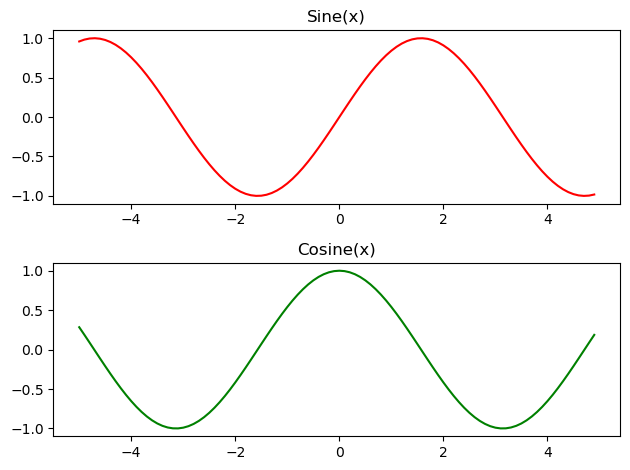

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 2, ncols = 1)

ax[0].plot(X,Y1, color = 'red')
ax[0].set_title("Sine(x)")

ax[1].plot(X,Y2, color = 'green')
ax[1].set_title("Cosine(x)") 

fig.tight_layout()

Now let's try and plot the on the same axes

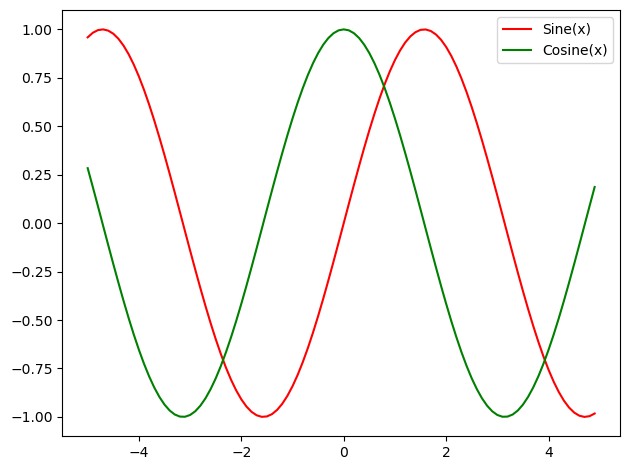

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.plot(X,Y1, color = 'red', label = 'Sine(x)')
ax.plot(X,Y2, color = 'green', label = 'Cosine(x)' )

ax.legend()

fig.tight_layout()

# Overview of Session 5

Today, we will work with strings, requests and APIs. In particular, we will cover:
1. Text as Data:
    - What is a string, and how do we work with it?
2. Key Based Containers:
    - What is a dictionary, and how is this different from lists and tuples?
    - When are dictionaries useful, and how do we work with them?
3. Interacting with the Web:
    - What is HTTP and HTML?
    - What is an API, and how do interact with it?
4. Leveraging APIs:
    - What kinds of data can be extracted via an API?
    - How do we translate an API into useful data?

# Associated Readings

PDA:
- Section 2.3 p. 36-38: How to work with strings in Python
- Section 3.3 p. 77-80: Opening text files, interpreting characters
- Section 6.1 p. 187-189: JSON data
- Section 6.3: Intro to interacting with APIs

Gazarov (2016): "What is an API? In English, please."
- Excellent and easily understood intro to the concept
- Examples of different 'types' of APIs
- Intro to the concepts of servers, clients and HTML

# Text as Data

## Why Text Data? 

Data is everywhere... and collection is taking speed! 
- Personal devices and [what we have at home](https://www.nytimes.com/wirecutter/blog/amazons-alexa-never-stops-listening-to-you/) (e.g. Siri, Alexa etc.)
- Online in terms of news websites, wikipedia, social media, blogs, document archives (lots of information!)

Working with text data opens up interesting new avenues for analysis and research. Some cool examples:
  - Text from central bank reports to analyse how the signals sent by the central bank affect long-run interest rates:
      - [Narrative signals about uncertainty in inflation reports drive long-run outcomes](https://sekhansen.github.io/pdf_files/jme_2019.pdf)
  - Text from annual reports to predict financial distress 
      - [Predicting Distresses
using Deep Learning of
Text Segments in Annual
Reports](https://www.nationalbanken.dk/da/publikationer/Documents/2018/11/WP_130.pdf)

## Text as Data

Data from the web often come in HTML or other text format

In this course, you will get tools to do basic work with text as data.

However, in order to do that:

- learn how to manipulate strings
- save our text data in smart ways (JSON)
- interact with the web

## Videos and Exercises

Now proceed to the notebook with videos and exercises, where you will first learn a bit about string operations and different non-sequential containers. Then we proceed and you will get an opportunity to interact with the web.

The structure of the notebook is as follows:
1. String Operations:
    - Common string operations...
    - ... more string operations...
    - ... and warm-up exercises
2. Saving as Text File
3. Python Containers and Dictionaries
4. Python and the Web
    - Application Programming Interface (API)
    - The Punk API
    - The API for Statistics Denmark

# Video 5.1: Key Based Containers

## Containers Recap (I/II)

*What are containers? Which have we seen?*

Sequential (ordered) containers:
- `list` which we can modify (**mutable**).
    - useful to collect data on the go
- `tuple` which is after initial assignment **immutable**
     - tuples are faster as they can do less things
- `array` 
    - which is mutable in content (i.e. we can change elements)
    - but immutable in size
    - great for data analysis

## Containers Recap (II/II)

Non-sequential (no order) containers:
- Dictionaries (`dict`) which are accessed by keys (immutable objects).
- Sets (`set`) where elements are
    - unique (no duplicates) 
    - not ordered
    - disadvantage: cannot access specific elements!

## Dictionaries Recap (I/II)

*How did we make a container which is accessed by arbitrary keys?*

By using a dictionary, `dict`. Simple way of constructing a `dict`:

In [11]:
my_dict = {'Andreas': 'Assistant Professor',
           'Tobias': 'PhD Fellow',
           'Hjalte': 'PhD Fellow'}

In [12]:
print(my_dict['Tobias'])

PhD Fellow


In [13]:
my_new_dict = {}
for a in range(0,100):
    my_new_dict["cube%s" %a] = a**3
    
print(my_new_dict['cube10'])

1000


Sidenote: The `%s` token is replaced by whatever is passed to the string after the `%` symbol.

## Dictionaries Recap (II/II)

Dictionaries can also be constructed from two associated lists. These are tied together with the `zip` function. Try the following code:

In [14]:
keys = ['a', 'b', 'c']
values = range(2,5)

key_value_pairs = list(zip(keys, values))
print(key_value_pairs) #Print as a list of tuples

[('a', 2), ('b', 3), ('c', 4)]


In [15]:
my_dict2 = dict(key_value_pairs)
print(my_dict2) #Print dictionary

{'a': 2, 'b': 3, 'c': 4}


In [16]:
print(my_dict2['a']) #Fetch the value associated with 'a'

2


## Storing Containers

*Does there exist a file format for easy storage of containers?*

Yes, the JSON file format.
- Can store lists and dictionaries.
- Syntax is the same as Python lists and dictionaries - only add quotation marks. 
    - Example: `'{"a":1,"b":1}'`
- The most common format when accessing data through an API
- When scraping you will often format the collected data as a JSON file

# VIDEO 5.2: Interacting with the Web

## The Internet as Data (I/II)

When we surf around the internet we are exposed to a wealth of information.

- Examples: Facebook, Twitter, Reddit, Wikipedia, Airbnb etc.

What if we could take this and analyze it?

- Well, we can. And we will. 

## The Internet as Data (II/II)


- Sometimes we get lucky. The data is served to us (i.e. weather data in assignment 0)
- The data is provided as an `API` service (today)
- The data can extracted by queries on underlying tables (scraping sessions). However, often we need to do the work ourselves:
    - We need to explore the structure of the webpage we are interested in
    - We can extract relevant elements 


## Web Interactions

In the words of Gazarov (2016): The web can be seen as a large network of connected servers
- A page on the internet is stored somewhere on a remote server
    - Remote server $\sim$ (part of a) remotely located computer that is optimized to process requests

- When accessing a web page through browser:
    - Your browser (the *client*) sends a request to the website's server
    - The server then sends code back to the browser
    - This code is interpreted by the browser and displayed


## The Web Protocol
*What is `http` and where is it used?*

- `http` stands for HyperText Transfer Protocol.
- `http` is used for transmitting the data when a webpage is visited:
   - The visiting client (i.e. Chrome) sends a `http` request to the web (e.g. an HTML page, JPG image, data etc.);
   - The server receives and processes the request, and returns a `http` response to the browser.
   - Note: `http` is not a programming language, but a protocol for transferring the hypertext pages from Web Server to Web Browser

*Should we care about `http`?*

- In this course we ***do not*** care explicitly about `http`. 
- We use a Python module called `requests` as a `http` interface.


## Markup Language
*What is `html` and where is it used?*

- HyperText Markup Lanugage
- Most common programming languages used to create and design websites and pages
  - That is, `html` contains: content, design, available actions.

*Should we care about `html`?*

- Yes, `html` is often where the interesting data can be found.
- Sometimes, we are lucky, and instead of `html` we get a JSON in return. 
- Getting data from `html` is the topic of the coming scraping sessions.

# VIDEO 5.3: Leveraging APIs 

## Web APIs (I/IV)
*So when do we get lucky, i.e. when is `html` not important?*

- When we get a Application Programming Interface (`API`) on the web
- The API usually provides access to a database or some service
- How does it work?
  - We send a query to the Web API (e.g. a `http`-request / URL that describes the relevant content)
  - We get a response from the Web API with data back in return, typically as structured as JSON (but could really be any format).


## Web APIs (II/IV)
*So where is the API?*

- Usually on separate sub-domain, e.g. `api.github.com`
    - The data is often not visible
    - We have to access it through the http-request / URL
- Sometimes hidden in code (see sessions on scraping) 

*So how do we know how the API works?*

- There usually is some documentation. E.g. google ["api github com"](https://www.google.com/search?q=api+github)

## Web APIs (III/IV)
*So is data free? As in free lunch?*

- Most commercial APIs require authentication and have limited free usage
  - e.g. Google Maps, various weather services

- Some open APIs that are free
  - Danish 
    - Statistics Denmark (DST)
    - Danish weather data (DMI)
    - Danish spatial data (DAWA, danish addresses) 
  - Global
      - OpenStreetMaps, Wikipedia

- If no authentication is required the API may be delimited.
  - This means only a certain number of requests can be handled per second or per hour from a given IP address.

## Web APIs (IV/IV)
*So how to make the URLs?*

- An `API` query is a URL consisting of:
  - Server URL, e.g. `https://api.github.com`
  - Endpoint path, `/users/isdsucph/repos`
  
- The `API` documentation can then be used to built URLs that access relevant information 

## Web APIs: An Example

- Let's consider the punk API that contains information on a large selection of beers
    - https://punkapi.com/

In [17]:
import requests
response = requests.get('https://api.punkapi.com/v2/beers/1')
response.json()[0]['name']

'Buzz'